## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.   

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import the required libraries.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Set the seed
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read the dataset and take a look at the top few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Find the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Find the number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Find the proportion of users converted. It denotes whether the user decided to pay for the company's product. 
# Here, 1 means yes, the user bought the product.
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# The control group users are expected to be served with old_page; and treatment group users are matched with the new_page.
# Find the number of times 'group' and 'landing_page' don't match
treat_old = df.query('group == "treatment" & landing_page != "new_page"')['user_id'].count()
cntl_new = df.query('group == "control" & landing_page != "old_page"')['user_id'].count()
treat_old + cntl_new

3893

f. Do any of the rows have missing values?

In [7]:
# Find any rows with missing values
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows where 'group' and 'landing_page' don't match, and store the result in a new dataframe df2
df0 = df.query('group == "treatment" & landing_page == "new_page"')
df1 = df.query('group == "control" & landing_page == "old_page"')
df2 = df0.append(df1)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Find the number of rows in the dataset
df2.shape[0]

290585

In [11]:
# Find the number of unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Identify the one non-unique user
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# Display the row information for the repeat user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Remove one of the rows with a duplicate user_id.
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')

# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# Find the probability of an individual converting regardless of the page they receive
p_population = df2.converted.mean()
p_population

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Given that an individual was in the 'control' group, find the probability they converted
p_control = df2.query('group == "control"')['converted'].mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# Given that an individual was in the 'treatment' group, find the probability they converted
p_treatment = df2.query('group == "treatment"')['converted'].mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# Find the probability that an individual received the new page
df2.query('landing_page == "new_page"')['user_id'].count()/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the calculated proportion of conversion, the control group (i.e. the user group landing on the old webpage) has a slightly higher conversion rate than the treatment group (i.e. the user group landing on the new webpage). With almost 50:50 chance of landing on the old or the new page, the small difference in the conversion rate between the control group (@12.04%) and the treatment group (@11.88%) may be due to chance. So, there is no sufficient evidence to say that the new webpage leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis**

**$H_0$: $p_{new} \le p_{old} 
 (or)  
p_{new} - p_{old} \le 0$** 

In other words, the null hypothesis states that the population conversion rate in the user group using the old page is same or higher when compared to the population conversion rate in the user group using the new page.

**Alternative Hypothesis**

**$H_1$: $p_{new} \gt p_{old} 
 (or)  
p_{new} - p_{old} \gt 0$** 

In other words, the alternative hypothesis states that the population conversion rate in the user group using the new page is higher when compared to the population conversion rate in the user group using the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# Find the convert rate for 𝑝_𝑛𝑒𝑤 under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# Find the convert rate for 𝑝_𝑜𝑙𝑑 under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
# Find the number of individuals in the treatment group
n_new = df2.query('group == "treatment"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [22]:
# Find the number of individuals in the control group
n_old = df2.query('group == "control"')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Simulate a Sample for the treatment group under the null hypothesis
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# Simulate a Sample for the control group under the null hypothesis
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# Find the difference in the "converted" probability
new_page_converted.mean() - old_page_converted.mean()

0.0013814087500682581

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Sampling distribution 
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

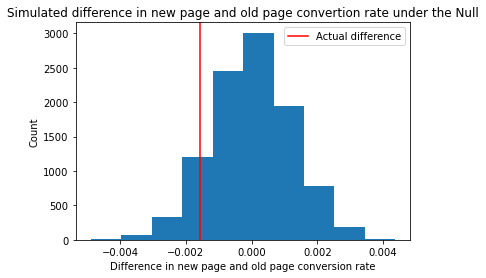

In [27]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment - p_control

# Plot the histogram
plt.hist(p_diffs)
plt.title('Simulated difference in new page and old page convertion rate under the Null')
plt.xlabel('Difference in new page and old page conversion rate')
plt.ylabel('Count')
plt.axvline(x=obs_diff, color='red', label="Actual difference")
plt.legend()
plt.show();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Find the proportion of the p_diffs that are greater than the actual difference observed
p_value = (p_diffs>obs_diff).mean()
p_value

0.9038

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Assuming that the Null hypothesis is true, we first simulate from the closest value to the alternative that is still in the null space. In this case, it is $p_{new} - p_{old} = 0  (or)  p_{new} = p_{old}$**

**With a sample size of over 145K for each of the new page and the old page, the sampling distribution of the difference in conversion rate should follow a normal distribution according to the Central Limit Theorem.**

**The distribution plot of p_diffs definitely looks normal with a mean of close to zero.**

**Since the Alternative hypothesis contains "$\gt$", the proportion of p_diffs greater than the actual difference in conversion rate observed is called the p-value.**

**A p-value of 0.90 indicates that our data is consistent with the null hypothesis even after taking into account the type-1 error rate of 0.05. Hence, we fail to reject the Null Hypothesis. In other words, the conversion rate in the new page is not definitely better than the the conversion rate in the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df.query('landing_page == "old_page" & converted == 1')['user_id'].count()

# number of conversions with the new_page
convert_new = df.query('landing_page == "new_page" & converted == 1')['user_id'].count()

# number of individuals who were shown the old_page
n_old = df.query('landing_page == "old_page"')['user_id'].count()

# number of individuals who received new_page
n_new = df.query('landing_page == "new_page"')['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
# Calculate the z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3683341399998907 0.9143962454534289


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**By definition, z-score is the distance between the population mean and a data point in terms of the standard deviation. A z-score of -1.37 indicates that a data point is 1.37 standard deviation below the mean. More specifically, here the z-score represents the distance between the population and the sample conversion rate difference between the control(old) and the treatment(new) groups in terms of standard deviation.**

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample.
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples.

**Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values:**
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests.

**Ours is a right-tailed test because the Alternative Hypothesis contains $"\gt"$. For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$.**

**$Z_{score}$ = -1.368 and $Z_{\alpha}$ = 1.645. So, we fail to reject the Null Hypothesis. The result is consistent with what was found out using the sampling distribution.** 

**Even the p-value calculated here using the built-in function nearly coincides with the p-value calculated before, providing strong evidence against rejecting the Null Hypothesis.**

**Hence all the results obtained so far provide strong evidence that the conversion rate in the new page is not definitely better than the conversion rate in the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the predicted response variable "Converted" is limited to two values: 0(not-converted) or 1(converted), we will be performing Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Create the intercept column
df2['intercept'] = 1

# Create the dummy variable columns, drop one of the columns and rename the other to 'ab_page'
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control', axis=1)
df2.rename(columns={'treatment': 'ab_page'}, inplace=True)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
# Instantiate the model, and fit the model 
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# Display the summary of the model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-10-11 20:51 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The Null and Alternative Hypotheses in Part II - A/B Test are associated with one-tailed tests. However, in regression testing, the Null and Alternative Hypotheses for the 'ab-page' explanatory variable are associated with two-tailed test and are as follows:**

**Null Hypothesis:**

**$H_0$: $\beta_{1} = 0$**


**Alternative Hypothesis:**

**$H_1$: $\beta_{1} \ne 0$**


**Because the Null and Alternative Hypotheses are different here, the p-value (0.19) obtained is also different. This p-value indicates that there is no statistically significant evidence that the conversion rate in the new page differs from the conversion rate in the old page. In hindsight, this coincides with our previous findings that the conversion rate in the new page is not definitely better than the conversion rate in the old page.**

In [34]:
# Interpret the coeff. for ab_page
np.exp(-0.0150)

0.9851119396030626

**For every 1 conversion in the control group (or old page), there is 0.985 conversion in the treatment group (or new page). This is in-line with our previous finding using the Null Hypothesis (or p-value) that there is no statistically significant evidence that the conversion rate in the new page differs from the conversion rate in the old page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Since landing in the new page or the old page doesn't provide significant difference in the conversion rate, it is better to consider other things that might influence whether or not an individual converts. However, the problem with adding multiple X or explanatory variables to the regression model is multicollinearity i.e. X variables might have relationship among each other.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
# Read the 'countries' dataset and merge into the existing dataframe to form df_new
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [36]:
# Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [37]:
# Fit the model and obtain the results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
results=logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-10-11 20:51 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [38]:
# Interpret the coeff. for country CA
np.exp(-0.0408)

0.9600211149716509

In [39]:
# Interpret the coeff. for country UK
np.exp(0.0099)

1.0099491671175422

**Irrespective of what page they land in, for every 1 user converted in the US, there is 0.96 user converted in Canada and 1.01 user converted in the UK. The p-values for both Canada (0.1295) and the UK (0.4573) also confirm that there is no statistically significant evidence that the conversion rate in Canada or the UK differs from the conversion rate in the US.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
# Create the necessary interaction variables
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']

In [41]:
# Fit the model and obtain the results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_ab_page', 'UK_ab_page']])
results=logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-10-11 20:51 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

In [42]:
# Interpret the coeff. for interaction: country CA and ab_page
np.exp(-0.0469)

0.9541828111007262

In [43]:
# Interpret the coeff. for interaction: country UK and ab_page
np.exp(0.0314)

1.0318981806179213

**For every 1 user converted in the US in the control group (or old page), there is**
 - **0.95 user in Canada converted in the treatment group (or new page)**
 - **1.03 user in the UK converted in the treatment group (or new page)**
 
**So, with all the regression modeling done so far, the group or the country or the combination of both doesn't have any significant influence on whether or not an individual converts.** 

<a id='conclusions'></a>
## Conclusions

**From the A/B test done, there is no compelling evidence that the new page is generating more conversions than the old page. In fact, the old page conversion rate is slightly higher than the new page conversion rate. This may be due to change aversion. The company can run the experiment for a little longer and see whether the results change. If it doesn't, the company is better off keeping the old page. However, if the company really wants to improve the conversion rate, then they can enhance the new page to a better design and redo the A/B test.**

**The regression modeling also confirms the result from A/B test that the new page is not better than the old page when it comes to conversion rate. In addition, the country where the user lives doesn't have any significant impact on the conversion rate.**